In [ ]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Dimensionality Reduction

Many ML problems involve thousands or even millions of features for each training instance. This both makes training *extremely* slow as well as making it much harder to find a good solution. This is known as the *curse of dimensionality*.

Fortunately, in real-world problems, it's often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. As an example, with the MNIST images, the border pixels are almost always white so they could be dropped from the training set without losing much information. Moreover, neighboring pixels tend to be highly correlated; if you merge them into a single pixel (by doing something like taking the mean of the two pixel intensities) you won't lose much information.

*Note: As you know, reducing dimensionality will make you lose some information (like compressing a photo to JPEG can degrade quality) so even though training will speed up, it may make the system perform worse as well as making your pipelines more complex (and thus harder to maintain). Therefore, you should try to train the system with the original data before considering using dimensionality reduction if trainnig is too slow. In some cases, however, reducing dimensionality of the training data may filter out some noise and unnecessary details (and thus result in higher performance) but this generally won't happen.*

Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization (a.k.a. *DataViz*). Reducing the number of dimensions down to two or three makes it possible to plot a high-dimensional training set on a graph and often gain some important insights by visually detecting patters, such as clusters.

We'll discuss the curse of dimensionality and get a sense of what goes on in high-dimensional space. Then, we'll present the two main approaches to dimensionality reduction (projection and Manifold Learning) and we'll go through three of the most popular dimensionality reduction techniques: PCA, Kernel PCA, and LLE.

## The Curse of Dimensionality

We're pretty used to life in 3 dimensions (or 4 counting time), so our intuition fails us when we try to imagine a high-dimensional space. Try googling a tesseract to see what I mean. It turns out that many things behave differently in high-dimensional space. A troublesome difference is that if you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly 0.52 units. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66 units. IF you pick two points randomly on a 1,000,000-dimensional hypercube? The average distance, surprisingly, will be about 408.25 units (roughly $\sqrt{1,000,000/6}$). It may seem weird that the points are so far apart but yet on the same cube. This does imply though that higher dimensional datasets are at risk of being very sparse; most training instances are likely to be far away from each other. Of course, this also means that a new instance will likely be far away from any training instance, making predictions much, *much* less reliable than in lower dimensions since they'll be based on much larger extrapolations. In short, __the more dimensions the training set has, the greater the risk of overfitting it__.

Theoretically, one solution to this would be to increase the size of the training set to reach a sufficient density of training instances. In practice, sadly, the number of training instances required to reach a given density grows exponentially with the number of dimensions. With just 100 features (much less than MNIST, by the way), you'd need more training instances than atoms in the *__observable universe__* in order for training instances to be withing 0.1 units of each other on average (assuming they were spread out uniformly across all dimensions).

## Main Approaches for Dimensionality Reduction

Before we dive into the algos, let's take a look at the two main approaches to reducing dimensionality: projection and Manifold Learning

### Projection

In most real-world problems, training instances *aren't* spread out uniformly across all dimensions. Many features are almost constant, whilst others are highly correleated (like in the MNIST dataset). As a result, all training instances actually lie within (or close to) a much lower-dimensional *subspace* of the high-dimensional space. If we project each training instance perpendicularly (or technically, orthogonally) onto this subspace, we get a 2D dataset that corresponds to the 3D one.

However, this isn't always the best approach to dimensionality reduction. IN many cases, the subspace may twist and turn, such as in the famous [*Swiss roll*](https://www.mathworks.com/content/mathworks/www/en/products/demos/machine-learning/swiss_roll/swiss_roll/jcr:content/mainParsys/image_1.adapt.full.high.png/1469940824635.png) dataset. Simply projecting this dataset onto a plane would squash differently layers together. What we'd really like for this dataset would be to "unroll" it flat.

### Manifold Learning

The Swiss roll is an example of a 2D *manifold*. Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space. More generally, a $d$-dimensional manifold is part of an $n$-dimensional space (where $d \lt n$) that locally resembles a $d$-dimensional hyperplane. In the case of the Swiss roll, $d = 2$ and $n = 3$. It locally resembles a 2D plane that was rolled in the third dimension.

Many dimensionality reduction algos work by modeling the *manifold* on which the training instances lie; this is called *Manifold Learning*. It relies on the *manifold assumption* (a.k.a. the *manifold hypothesis*) which holds that most real-world, high-dimensional datasets lie closer to a much lower-dimensional manifold. This assumption is often empirically observed.

Using the MNISt dataset, we can see that if we randomly generated images, only a *ridiculously* small amount of them would look like handwritten digits. Since the degrees of freedom available for creating a digit are dramatically lower than the degrees of freedom available if we could generate any image we wanted, the constraints tend to squeeze the dataset into a lower-dimensional manifold.

The manifold assumption is often accompanied by another implicit assumption: that the task at hand (classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold. This assumption doesn't always hold though.

In short, __if you reduce the dimensionality of the training set before training a model, it will definitely speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.__

Now, time for the algorithms.

## PCA

*Principal Component Analysis* (PCA) is by the most popular dimensionality reduction algorithm. It first identifies the hyperplane that lies closest to the data, and then it projects the data onto that hyperplane.

### Preserving the Variance

Before you can project the training set onto lower-dimensional hyperplanes, you first need to choose the *correct* hyperplane. It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less info than the other projections. Another way to justify this choice is that the axis that minizies the mean squared distance between the original dataset and its projection onto that axis. This is the idea behind [PCA](https://goo.gl/gbNo1D).

### Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the training set. It also finds a second axis, orthogonal to the first, that accounts for the largets amount of raining variance. On higher-dimension datasets, PCA contiues this process so that there are as many axes as there are dimensinos in the dataset.

The unit vector that defines the i<sup>th</sup> axis is called the i<sup>th</sup> *principle component* (PC).

*Note: the direction of the principal components isn't stable; if you perturb the training set slightly and run PCA again, some of the new PCs may point in the opposite direction of the original ones. However, they will generally still lie on the same axes. In some cases, a pair of PCs may even rotate or swap, but the plane they define will generally remain the same.*

So, how can you find the principal components of a training set? There's a standard matrix factorization technique known as *Singular Value Decomposition* (SVD) that can decompose the training set matrix $\textbf{X}$ into the dot product of three matricies $\textbf{U} \cdot \Sigma \cdot \textbf{V}^T$ where $\textbf{V}$ contains all the principal components we're looking for. The matrix is given below:

$
\mathbf{V} =
\begin{pmatrix}
  \mid & \mid & & \mid \\
  \mathbf{c_1} & \mathbf{c_2} & \cdots & \mathbf{c_n} \\
  \mid & \mid & & \mid
\end{pmatrix}
$

We'll now write some Python that'll generate our 3D dataset, then will use NumPy's `svd()` function to obtain the principal components of the training set and extract the first two.

In [4]:
# Generate a 3D dataset

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [5]:
# Use svd()
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

*Note: PCA assumes that the dataset is centered around the origin. Scikit-Learn's PCA classes will take care of centering the data for us, but if we implement it ourselves (like we just did) or if we use other libraries, we'll have to center our data first.*

### Projecting Down to d Dimensions

Once the PCs have all been identified, you can reduce the dimensionality down to $d$ dimensions by projecting it onto the hyperplane defined by the first $d$ principal components. Selecting this hyperplane ensures that the projection will preserve as much variance as possible.

To project the training set onto the hyperplane, you can complute the dot product of the training set matrix $\textbf{X}$ by the matrix $\textbf{W}_d$ defined as the matrix containing the first $d$ principal components (i.e. the matrix composed of the first $d$ columns of $\textbf{V}$. The equation is formally written out as follows:

$$\textbf{X}_{d-proj} = \textbf{X} \cdot \textbf{W}_d$$

The following Python ocde projects the training set onto the plane defined by the first two principal components:

In [6]:
W2 = Vt.T[:, 2] # Grab the first two PCs and put them in a matrix
X2D = X_centered.dot(W2)

And there it is; dimensionality reduction of any dataset down to any number of dimensions whilst preserving as much variance as possible.

### Using Scikit-Learn

Scikit-Learn's `PCA` class impolements PCA using SVD decomposition just like we did. The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions (like we did):

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

After fitting the `PCA` transformer to the dataset, you can access the principal components using the `components_` variable (note that it contains the PCs as horizontal vectors, so, for example, the first principle component is equal to `pca.components_.T[:, 0]`)

### Explained Variance Ratio

Another very useful bit of info is the *explained variance ratio* of each principal component, available via the `explained_variance_ratio_` variable. It indicates the proportion of the dataset's variance that lies along the axis of each principal component. For example, let's check the expalined variance ratios of the first two components of the 3D dataset we made:

In [10]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This tells use that 84.2% of the dataset's variance lies on the first axis, and 14.6% lies on the second axis. This leaves less than 1.2% for the 3rd axis, so it is reasonable to assume that it probably doesn't have much information.

### Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it's generally perferable to choose the number of dimensions that addup to a sufficiently large portion of the variance (like 95% or so). Unless, of course, you're reducing dimensionality for data visualization–in that case you'd generally want to reduce dimensionality down to 2 or 3.

The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set's variance:

In [12]:
from utils import find_and_remove
from sklearn.datasets import fetch_mldata
from os.path import expanduser

home = expanduser("~/Coding Stuff/Python/handson-ml/datasets/")
find_and_remove('mnist-original.mat')
mnist = fetch_mldata("MNIST original", target_name='target', data_home=home)

X = mnist['data']
y = mnist['target']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

From here, we could set `n_components=d` and run PCA again, but there's a better option. Instead of specifying the number of PCs you want to preserve, you can set `n_components` to be a float between `0.0` and `1.0` indicating the ratio of variance you which to preserve.

In [15]:
# pca = PCA(n_components=d)
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

pca.n_components_

154

Another option is to plot the explained variance as a function of the number of dimensions. There will usually be an elbow in the curve where the explained variance stops growing fast. You can think of this as the intrinsic dimensional of the dataset.

### PCA for Compression

Obviously, after dimensionality reduction, the training set takes up much less space. On the MNIST dataset (preserving 95% variance), each instance will have slightly over 150 features instead of the original 784. This makes the dataset less than 20% of the original size whilst preserving 95% of the variance. This is a pretty solid compression ratio, and it's quite obvious how this would speed up a classification algo like an SVM classifier tremendously.

It's also possible to decompress the reduced dataset back to 784 dimensions by appling the inverse transformation of the PCA projection. This won't give you back the original data since the projection lost a bit of information within that 5% variance that was dropped, but it will likely be quite close to the original data. The mean squared distance between the original data and the reconstructed data (compressed then decompressed) is known as the *reconstruction error*. The following code decompresses our compressed MNIST dataset using the `inverse_transform()` method to return it back to 784.

In [16]:
X_recovered = pca.inverse_transform(X_reduced)

The equation for the inverse transform is given below:

$$\textbf{X}_{\text{recovered}} = \textbf{X}_{d-\text{proj}} \cdot \textbf{W}_d^T$$

### Incremental PCA

One problem with the preciding implementation of PCA is that it requires the whole training set to fit in memory for the SVD algo to run. Fortunately, *Incremental PCA* (IPCA) algos have been developed; you can split the training set into mini-batches and feed an IPCA algo one mini-batch at a time. This is useful for large training sets and also to apply PCA online (i.e. on the fly as new instanes arrive).

The following code splits the MNIST data into 100 mini-batches (using NumPy's `array_split()` metohd) and feeds them to sklearn's `IncrementalPCA` class to reduce the dimensionality of teh MNIST dataset down to 154 dimensions. Note that you must call the `partial_fit()` method with each mini-batch rather than the `fit()` method with the whole training set:

In [17]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

Alternatively, you can use NumPy's `memmap` class which allows you to manipulate a large array stored in a binary file on disk as if it were entirely in memory; the class loads only the data it needs in memory, when it needs it. Since the `IncrementalPCA` class uses only a small part of the array at any given time, the memory usage remains under control. This makes it possible to call the usual `fit()` method, as you can see below:

In [18]:
filename = 'my_mnist.data'
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

# deleting the X_mm object triggers its Python finalizer, which ensures data is saved to disk
del X_mm

In [19]:
# A new program would load up the data and use it for training
X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

### Randomized PCA

Scikit-Learn has yet another option for PCA called *Randomized PCA*. This is a stochastic algo that quickly finds an approximation of the first $d$ principal components. Its computational complexity is $O(m x d^2) + O(d^3)$ instead of $O(m x n^2) + O(n^3)$, so it's dramatically faster than previous algos when $d$ is much smaller than $n$:

In [20]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

## Kernel PCA

In chapter 5 (SVMs), we talked about the kernel trick: a methematical technique that implicity maps instances into a very high-dimensional space (called the *feature space*) enabling nonlinear classification and regression with Support Vector Machines. Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the *original space*.

It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction. This is called [*Kernel PCA* (kPCA)](https://goo.gl/5lQT5Q). It's often good at preserving cluster of instances after project, or sometimes even unrolling datasets that lie close to a twisted manifold.

The following code uses sklearn's `KernelPCA` class to perform kPCA with an RBF kernel:

In [22]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [23]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

### Selecting a Kernel and Tuning Hyperparameters

As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values. However, dimensionality reduction is often a prep step for a supervised learning task (e.g. classification) so you can simply use grid search to select the kernel and hyperparameters that lead to the best performance on that task. For example, the following code creates a two-step pipeline by first reducing dimensionality to two dimensions using kPCA then applying Logistic Regression for classification. Then it uses `GridSearchCV` to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline:

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

y = t > 6.9

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

Another totally unsupervised approach is to select the kernel and hyperparams that yield the lowest reconstruction error. However, reconstruction isn't as easy as with linear PCA. Thanks to the kernel trick, taking a 3D swiss roll and the resulting 2D dataset with an RBF kernel is mathematically equivalent to mapping the training set to an infinite-dimensional feature-space using the *feature map* $\varphi$, then projecting the transformed training set down to 2D using linear PCA. Notice that if we could invert the linear PCA step for a given instance in the reduced space, the reconstructed point would lie in feaure space, not the original space. Since the feature space has infinite dimensions, we cannot compute the reconstructed point and therefore cannot compute the true reconstruction error. It's fortunately possible to find a point in the original space that would map close to the reconstructed point. This is called the reconstruction *pre-image*. Once this pre-image is obtained, you can measure its squared distance to the original instance. You can then select the kernel and hyperparams that minimize this reconstruction pre-image error.

To do this, one solution is to train a supervised regression model with the projected instances as the training set and the original instances as the targets. Scikit-Learn does this automatically if you set `fit_inverse_transform=True` as seen below:

In [26]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.7863087957661

*Note: by default, `fit_inverse_transform=False` and `KernelPCA` has no `inverse_transform()` method. This method only gets created when you set `fit_inverse_transform=True`.*

From here, you can use grid search with cross-validation to find the kernel and hyperparameters that minimize this pre-image reconstruction error.

## LLE

[*Locally Linear Embedding*](https://goo.gl/iA9bns) (LLE) is another very powerful *nonlinear dimensionality reduction* (NLDR) technique. It's a manifold learning technique that doesn't rely on projects like the previous algos.

In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.) and then looking for a low-dimensional representation of the training set where these local relationships are best preserved (more details in a bit). This makes it particularly good at unrolling twisted manifolds, especially when there isn't much noise.

The following code uses sklearn's `LocallyLinearEmbedding` class to unroll the Swiss roll. The distances between instances are locally well preserved; however, distances aren't preseved on the larger scale.

In [27]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [29]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

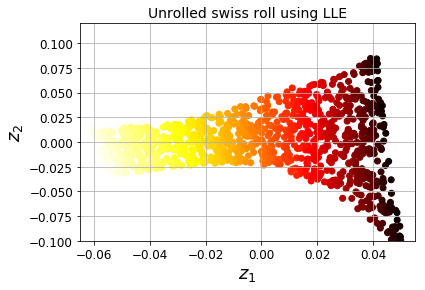

In [30]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

Here's how it works: first, for each training instance $\textbf{x}^i$, the algo identifies its $k$ closest neighbors (in the preceding code, $k = 10$), then it tries to reconstruct $\textbf{x}^i$ as a linear function of these neighbors. More specifically, it finds the weights $w_{i,j}$ such that the squared distance between $\textbf{x}^i$ and $\sum_{j=1}^mw_{i,j}\textbf{x}^j$ is as small as possible, assuming that $w_{i,j} = 0$ if $\textbf{x}^i$ is not one of the $k$ closest neighbors of $\textbf{x}^i$. Thus the first step of LLE is the constrained optimization problem described in the next equation where $\textbf{W}$ is the weight matrix contaning all of the weights $w_{i,j}$. The second constraint simply normalizes the weights for each training instance $\textbf{x}^i$:

$$\hat{\textbf{W}} = \mathop{\text{argmin}}_\textbf{W}\sum_{i=1}^m\Bigg(\textbf{x}^i-\sum_{j=1}^mw_{i,j}\textbf{x}^j\Bigg)^2 \\ \text{subject to}\begin{align*}\left\{\begin{array}{ll}w_{i,j} = 0 &\text{if $\textbf{x}^j$ is not one of the $k$ c.n. of $\textbf{x}^i$} \\ \sum_{j=1}^mw_{i, j} = 1 &\text{for i = 1,2, $\cdots$, m}\end{array}\right.\end{align*}$$

After this step, the weight matrix $\hat{\textbf{W}}$ (containing the weights $\hat{w}_{i, j}$ encodes the local linear relationship between the training instances. Now the second setp is to map the training instaces into $d$-dimensional space (where $d \lt n$) whilst preserving these local relationships as much as possible. If $\textbf{z}^i$ is teh image of $\textbf{x}^i$ in this $d$-dimensional space, then we want the squared distance between $\textbf{z}^i \text{ and } \sum_{j=1}^m\hat{w}_{i, j}\textbf{z}^j$ to be as small as possible. This idea leads to the next equation (an unconstrained optimization problem). It's simlar to the first step, but instead of keepign the instances fixed and finding the optimal weights, we're doing the reverse (keeping the weights fixed and finding the optimal position of the instances' images in the low-dimensional space. Note that $\textbf{Z}$ is the matrix containing all $\textbf{z}^i$:

$$\hat{\textbf{Z}} = \mathop{\text{argmin}}_\textbf{Z}\sum_{i=1}^m\Bigg(\textbf{z}^i - \sum_{j=1}^m\hat{w}_{i,j}\textbf{z}^j\Bigg)^2$$

Scikit-Learn's LLE implementation has the following computational complexity: $O(m\log(m)n\log(k))$ for finding the $k$ nearest neighbors, $O(mnk^3)$ for optimizing the weights, and $O(dm^2)$ for constructing the low-dimensional representations. Unfortunately, the $m^2$ in the last term makes the algo scale poorly to very large datasets.